# Prepared by
Davin Kaing, Nikhita Kandikonda, and Praneeth Tamvada

# Abstract

On average, fraud costs approximately 5% of an organization annual revenue [1]. This burden not only impacts the economy overall, it threatens the security of information. To better understand this issue, we examined the trend of various types of frauds, their economic costs, and the targetted age group. We built predictive models to forcast these factors into the future and present recommendations on how to best approach this problem.

# Background Research & Questions

As we enter the exciting era of big data, there is an enormous amount of information and tools that can help drive effective decisions. However, one of the biggest concerns is fraud. According to a survey conducted by Ernst & Young [2], one-third of global organizations aren't prepared for cyber breach. This poses a concern for the security of confidential data and it affects many organizations ranging from pharmaceutical industry to financial services. In this paper, we focus on the impact of fraud in the United States. We use linear regression to examine the trends of the last 6 years (2010-2015) of fraud data retrieved from Federal Trade Commission website [3]. We then used these trends to project into the next 6 years (2016-2021). We also examine the economic costs of fraud and the targeted age groups.

# Tools Used

This project is completed in both R and Python. We apply linear regression to build our models. To visualize our results, we use ggplot for both R and Python. For our analysis in python, we use the following packages: pandas, numpy, statsmodels, ggplot, collections, matplotlib, and warnings.

# Analysis

# Fraud Data

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from ggplot import *
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
fraud_df = pd.read_csv("~/Documents/Master's Program/Assignments/"+
                       "Intro to Data Science First Project/"+
                       "fraud data.csv")
fraud_df = fraud_df[["year", "state", "categories", "complaints"]]

In [4]:
# number of observations and variables
print("The dimension of the fraud data is", fraud_df.shape)

The dimension of the fraud data is (3060, 4)


In [5]:
# data is measuring the number of complaints by categories, state,
# and year

In [6]:
# mean, mode, median of each variable
fraud_df.describe()
complaints_mode = Counter(fraud_df['complaints']).most_common(1)
print(fraud_df.describe())
print("Mode of complaints is", complaints_mode)

              year     complaints
count  3060.000000    3060.000000
mean   2012.500000    1970.943791
std       1.708104    5823.773114
min    2010.000000      33.000000
25%    2011.000000     339.000000
50%    2012.500000     869.500000
75%    2014.000000    1939.500000
max    2015.000000  180943.000000
Mode of complaints is [(142.0, 7)]


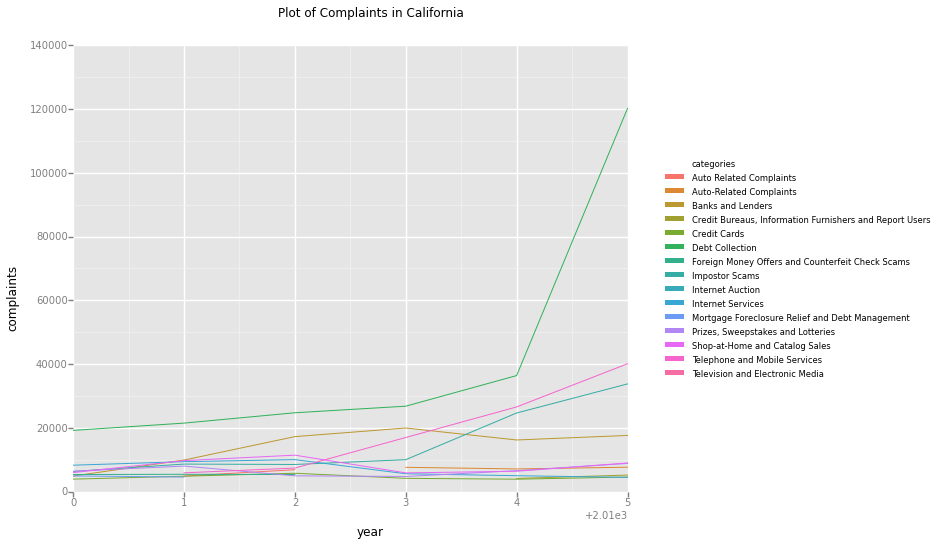

<ggplot: (290710518)>

In [7]:
# plot of complaints in California
CA = fraud_df[fraud_df['state']=="California"]
ggplot(aes(x = 'year', y = 'complaints', 
                 color = 'categories'), data= CA)+\
    geom_line()+\
    ggtitle("Plot of Complaints in California")

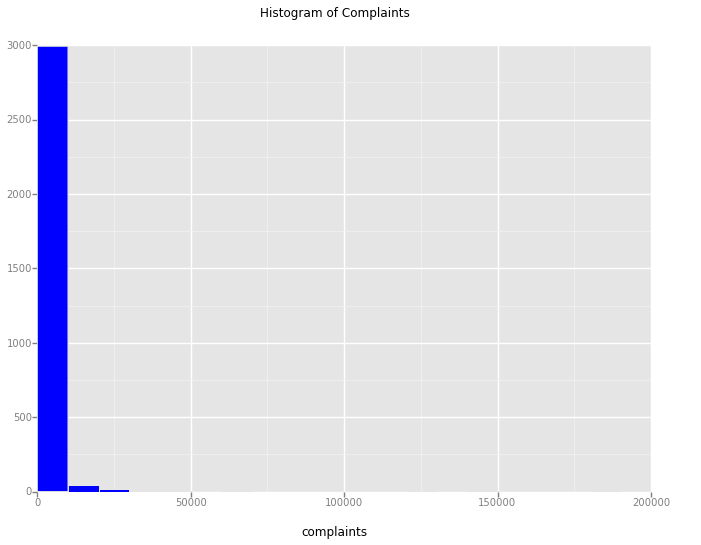

<ggplot: (-9223372036564064729)>

In [8]:
# visualizing complaints without transformation
ggplot(fraud_df, aes('complaints'))+\
    geom_histogram(binwidth = 10000)+ \
    ggtitle("Histogram of Complaints")

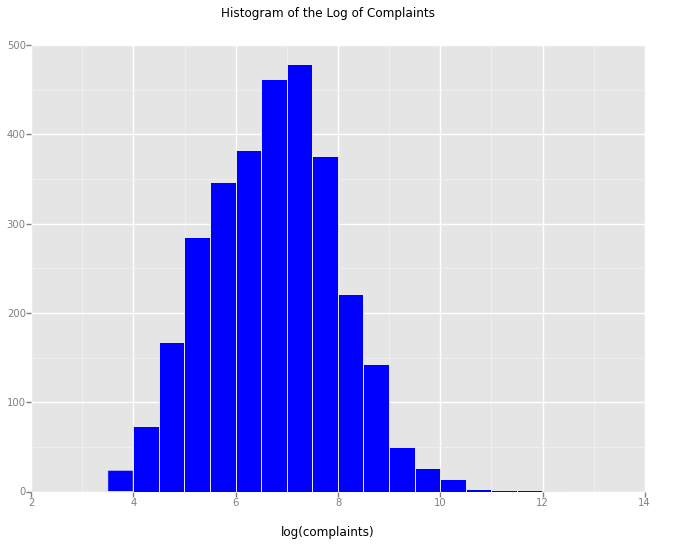

<ggplot: (291367919)>

In [9]:
# data tranformation
new_data = fraud_df[["year", "state", "categories", "complaints"]]
new_data[['complaints']] = np.log(new_data['complaints'])
ggplot(new_data, aes('complaints'))+geom_histogram(binwidth = 0.5)+\
    xlab("log(complaints)")+\
    ggtitle('Histogram of the Log of Complaints')

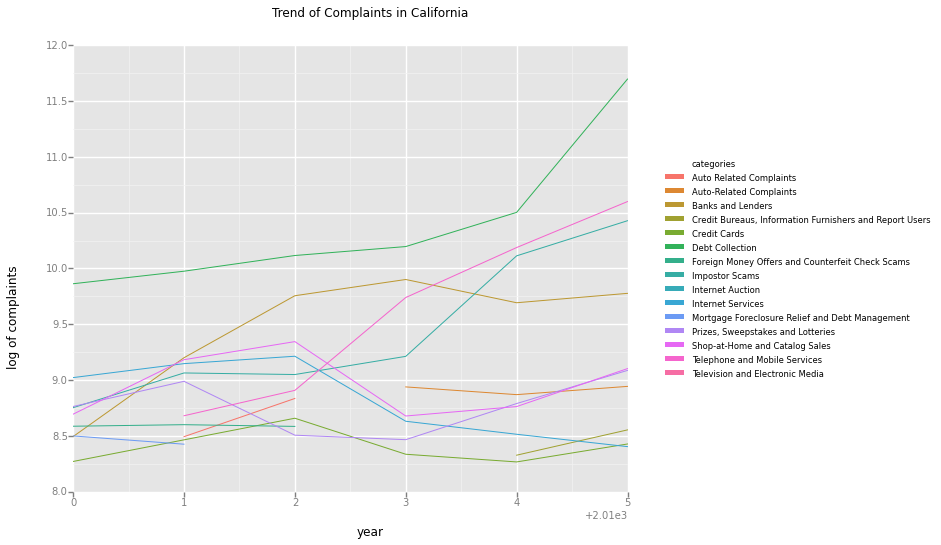

<ggplot: (-9223372036563411161)>

In [10]:
new_CA = new_data[new_data['state']=="California"]
ggplot(new_CA, aes(x = 'year', y = 'complaints', 
                   color = 'categories'))+\
    geom_line()+ylab("log of complaints")+\
    ggtitle("Trend of Complaints in California")

In [11]:
fraud_model = ols('complaints ~ state+categories+year', 
                  new_data).fit()
print("The R Squared for this fraud model is ",
      fraud_model.rsquared)

The R Squared for this fraud model is  0.915531129364


In [12]:
model2 = ols('complaints ~ state+year*categories', 
             new_data).fit()
print("The R Squared for this new fraue model is ", 
      model2.rsquared)


The R Squared for this new fraue model is  0.946316623672


In [13]:
predict_data = new_data[[0,1,2]]
predict_data[['year']] = predict_data[['year']]+6
predict_data = predict_data.assign(complaints= model2.predict(predict_data))

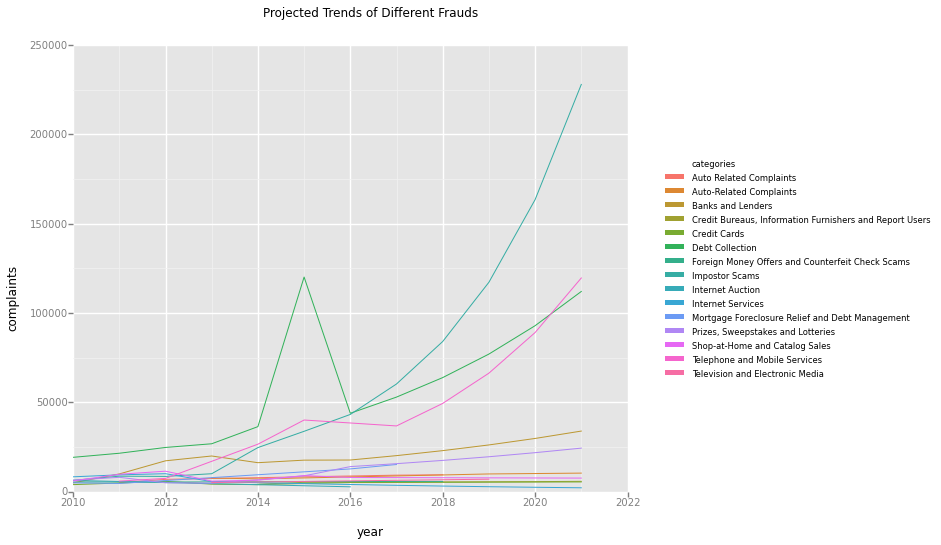

<ggplot: (-9223372036563498615)>

In [14]:
nap = new_data.append(predict_data)
CA = nap[nap['state']=="California"]
CA[['complaints']] = np.exp(CA[['complaints']])
ggplot(CA, aes(x = 'year', y = 'complaints', color = 'categories'))+\
geom_line()+ggtitle("Projected Trends of Different Frauds")

## Economic Loss Data

In [15]:
# economic loss

econ_df = pd.read_csv("~/Documents/Master's Program/Assignments/"+
                      "Intro to Data Science First Project/Economic "+
                      "Loss.csv")
econ_df = econ_df[[0,1,3]]
econ_df.columns = ['year', 'state', 'cost']
print(econ_df.describe())
print("The dimension of economic loss data is ", econ_df.shape)

              year          cost
count   306.000000  3.060000e+02
mean   2012.500000  2.228512e+07
std       1.710623  3.357683e+07
min    2010.000000  7.966000e+05
25%    2011.000000  5.234911e+06
50%    2012.500000  1.277170e+07
75%    2014.000000  2.747605e+07
max    2015.000000  2.325098e+08
The dimension of economic cost is  (306, 3)


In [33]:
cost_mode = Counter(econ_df['cost']).most_common(1)
print("The mode of economic cost is ", cost_mode)

The mode of economic cost is  [(6001153.96, 1)]


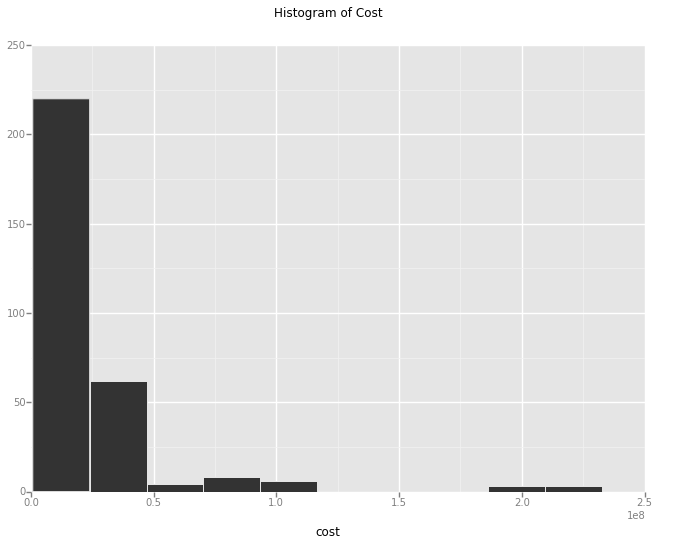

<ggplot: (295240319)>

In [34]:
ggplot(econ_df, aes('cost'))+geom_histogram()+\
xlab("cost") +ggtitle("Histogram of Cost")

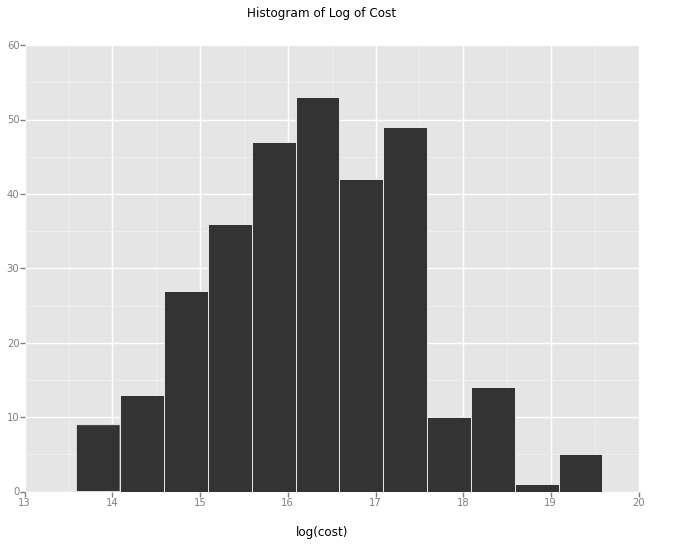

<ggplot: (-9223372036558043413)>

In [35]:

econ_df[['cost']] = np.log(econ_df['cost'])
ggplot(econ_df, aes('cost'))+geom_histogram(binwidth = 0.5)+\
    xlab("log(cost)") +ggtitle("Histogram of Log of Cost")


In [36]:
# economic loss model 
econ_model = ols('cost~year+state', econ_df).fit()
print("The R Squared for this economic model is ", 
      econ_model.rsquared)

The R Squared for this economic model is  0.93050593329


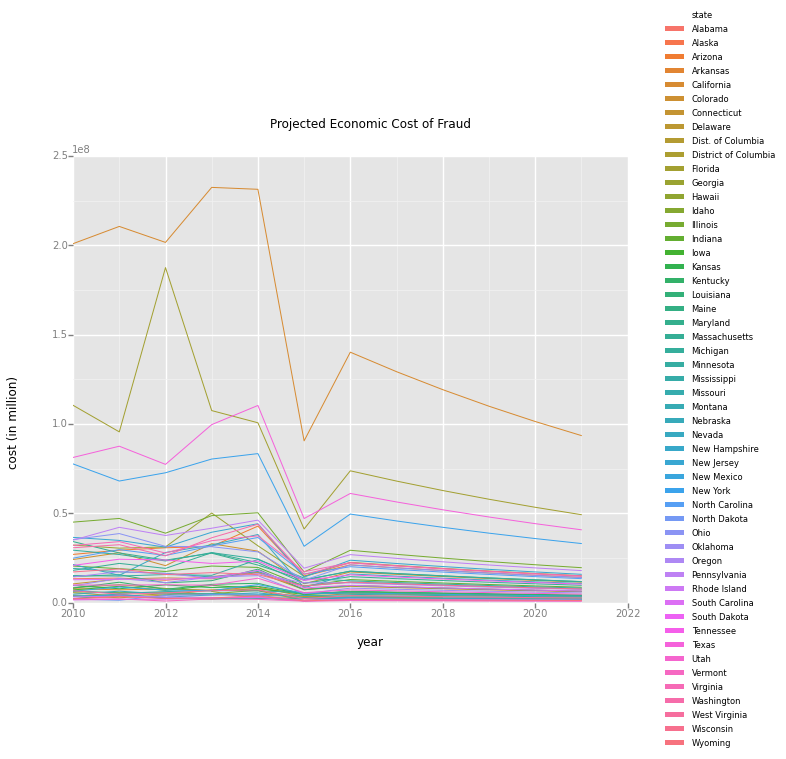

<ggplot: (296714977)>

In [37]:
econ_pred = econ_df[[0,1]]
econ_pred[['year']] = econ_pred[['year']]+6
econ_pred = econ_pred.assign(cost= np.exp(econ_model.predict(econ_pred)))
econ_df[['cost']] = np.exp(econ_df[['cost']])
combined_pred_orig = econ_df.append(econ_pred)
ggplot(combined_pred_orig, aes('year', 'cost', color = 'state'))+\
ylab("cost (in million)") +geom_line() +\
ggtitle("Projected Economic Cost of Fraud")

# Frauds Complaints By Age 

In [38]:
# age trend
age = pd.read_csv("~/Documents/Master's Program/Assignments/"+
                  "Intro to Data Science First Project/fraud "+
                  "complaints by age.csv")
age = age[[0,1,2]]
age.columns = ['year', 'age', 'complaints']
print(age.describe())
print("The dimension of age data is ", age.shape)

              year     complaints
count    42.000000      42.000000
mean   2012.500000   70122.571429
std       1.728527   33527.043034
min    2010.000000    3143.000000
25%    2011.000000   50195.500000
50%    2012.500000   75247.000000
75%    2014.000000   95160.000000
max    2015.000000  127742.000000


In [39]:
age_complaints_mode = Counter(age['complaints']).most_common(1)
print("The mode of complaints in the age dataset is ", age_complaints_mode)

The mode of complaints in the age dataset is  [(80832, 1)]


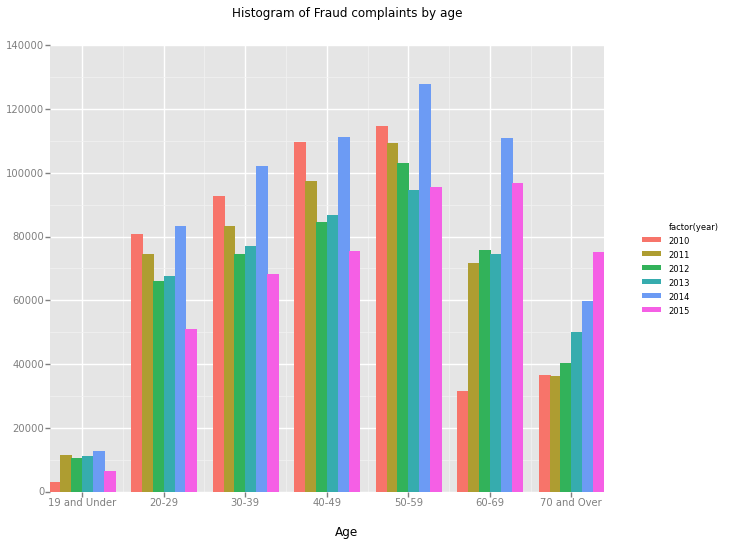

<ggplot: (-9223372036557730707)>

In [42]:
ggplot(age, aes(x='factor(age)',weight='complaints',fill='factor(year)'))+\
    geom_bar(stat="identity")+\
    xlab("Age") +ggtitle("Histogram of Fraud complaints by age")

In [43]:
age_model = ols('complaints~year+age+year*age', age).fit()
print("The R Squared for this age model is ", age_model.rsquared)

The R Squared for this age model is  0.917262923701


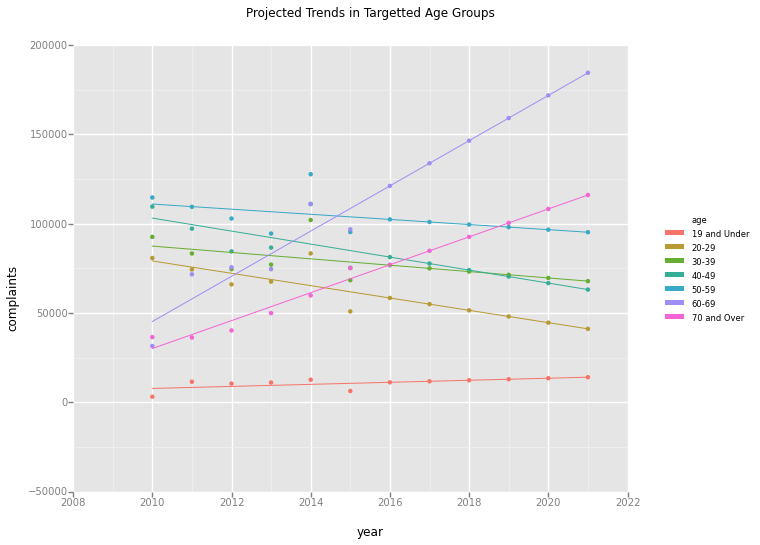

<ggplot: (297649493)>

In [44]:
age_pred = age[[0,1]]
age_pred[['year']] = age_pred[['year']]+6
age_pred = age_pred.assign(complaints= age_model.predict(age_pred))
combined_pred_age = age.append(age_pred)
ggplot(combined_pred_age, aes(x = 'year', y = 'complaints', color = 'age'))+\
geom_point()+stat_smooth(method = "lm", se = False)+\
ggtitle("Projected Trends in Targetted Age Groups")


# Reference

2016 ACFE Report to the Nations. (n.d.). Retrieved October 08, 2016, from http://www.acfe.com/rttn2016/costs.aspx

EY Identifies Top Fraud and Corruption Trends for 2016. Retrieved October 08, 2016, from http://www.ey.com/us/en/newsroom/news-releases/news-ey-identifies-top-fraud-and-corruption-trends-for-2016

Consumer Sentinel Network Reports. Retrieved October 08, 2016, from https://www.ftc.gov/enforcement/consumer-sentinel-network/reports